In [44]:
!pip install xarray

In [45]:
import numpy as np
print("numpy version=", np.__version__)
import xarray as xr
print("xarray version=", xr.__version__)

numpy version= 1.22.1
xarray version= 2023.6.0


In [46]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:77% !important; }</style>"))

# For users

## Overview: why xarray?

- Xarray adds labels (e.g., dimensions, coordinates, attributes) on top of numpy arrays

- N-dim arrays (aka tensors) supported by numpy
- Xarray allows to
    - apply ops over dimensions by name
    - select values by label (instead of integer location)
    - vectorizes
    - split-apply-combine paradigm
    - use dimension names (e.g., `dim='time'` vs `axis=0`)
    - write less code
    
`DataArray` = labeled N-dimensional array
    - generalizes `pd.Series`
    - attaches labels to `np.ndarray`

`Dataset` = dict-like container of `DataArray`
    - similar to `pd.DataFrame`
    - arrays in `Dataset` can have different number of dimensions

## Quick overview

From https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html

### Create DataArray

In [47]:
# Create a 2D array
# Assign x and y to the dimensions
# Associate coordinate labels 10 and 20 to locations along x dimension.
data = xr.DataArray(np.random.rand(2, 3),
                    dims=("x", "y"),
                    coords={"x": [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)>
array([[0.55811848, 0.07164641, 0.83981615],
       [0.143521  , 0.74228151, 0.52070932]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [48]:
print(data)

<xarray.DataArray (x: 2, y: 3)>
array([[0.55811848, 0.07164641, 0.83981615],
       [0.143521  , 0.74228151, 0.52070932]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y


In [49]:
data.values

array([[0.55811848, 0.07164641, 0.83981615],
       [0.143521  , 0.74228151, 0.52070932]])

In [50]:
data.dims

('x', 'y')

In [51]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [52]:
data.attrs

{}

### Indexing

In [53]:
# positional and by integer label (like numpy)
data[0, :]

<xarray.DataArray (y: 3)>
array([0.55811848, 0.07164641, 0.83981615])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [54]:
# loc, "location": by position and coordinate label (like pandas)
# Get data along the first dimension for the index called `10`
data.loc[10]

<xarray.DataArray (y: 3)>
array([0.55811848, 0.07164641, 0.83981615])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [55]:
# isel, "integer select": by dimension name and integer label
# Get data along the dimension `x` for the first index
data.isel(x=0)

<xarray.DataArray (y: 3)>
array([0.55811848, 0.07164641, 0.83981615])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [56]:
# sel, "select", by dimension name and coordinate label
# Get data along the dimension `x` and the index `10`
data.sel(x=10)

<xarray.DataArray (y: 3)>
array([0.55811848, 0.07164641, 0.83981615])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

### Attributes

You can add metadata attributes to `DataArray` or to coordinates
They are used automatically in the plots

In [57]:
data.attrs["long_name"] = "random_velocity"
data.attrs["units"] = "m/s"
data.attrs["description"] = "A random var created as an example"

print(data.attrs)

{'long_name': 'random_velocity', 'units': 'm/s', 'description': 'A random var created as an example'}


In [58]:
data.x.attrs["units"] = "x units"

### Computation

In [59]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[10.55811848, 10.07164641, 10.83981615],
       [10.143521  , 10.74228151, 10.52070932]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [60]:
data.sum()

<xarray.DataArray ()>
array(2.87609286)

In [61]:
data.mean(dim="x")

<xarray.DataArray (y: 3)>
array([0.35081974, 0.40696396, 0.68026273])
Dimensions without coordinates: y

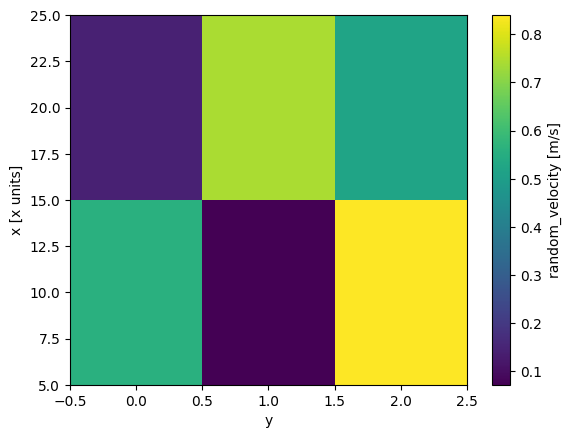

In [62]:
data.plot()

In [63]:
# From xarray to pd.Series.
srs = data.to_series()
srs

x   y
10  0    0.558118
    1    0.071646
    2    0.839816
20  0    0.143521
    1    0.742282
    2    0.520709
dtype: float64

In [64]:
# From pd.Series to xarray.
srs.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[0.55811848, 0.07164641, 0.83981615],
       [0.143521  , 0.74228151, 0.52070932]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) int64 0 1 2

### Datasets

- Variables in a `Dataset` can have different dimensions and dtypes
- If two variables have the same dimension (e.g., `x`) the dimension must be identical in both variables

In [65]:
# Create a dictionary with heterogeneous data.
dict_ = dict(foo=data, bar=("x", [1, 2]), baz=np.pi)
print(dict_)

{'foo': <xarray.DataArray (x: 2, y: 3)>
array([[0.55811848, 0.07164641, 0.83981615],
       [0.143521  , 0.74228151, 0.52070932]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example, 'bar': ('x', [1, 2]), 'baz': 3.141592653589793}


In [77]:
# Create a dataset from the dict.
# - foo is a DataArray (with 2 dimensions)
# - bar is a one-dimensional
# - baz is a scalar (with no dimensions)
ds = xr.Dataset(dict_)
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.5581 0.07165 0.8398 0.1435 0.7423 0.5207
    bar      (x) int64 1 2
    baz      float64 3.142

In [72]:
# Extract one variable from the dataset.
ds["foo"]
# Equivalent to:
#ds.foo

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[0.55811848, 0.07164641, 0.83981615],
       [0.143521  , 0.74228151, 0.52070932]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example

In [75]:
# Both `foo` and `bar` variables have the same coordinate `x`.
# So we can use `x` to slice the data.
ds["x"]
#ds.bar["x"]
#ds.foo["x"]

<xarray.DataArray 'x' (x: 2)>
array([10, 20])
Coordinates:
  * x        (x) int64 10 20
Attributes:
    units:    x units